## Backpropagation für Mehrschichtperzeptrone

### Spielzeugdatensatz

Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungs-
seite auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für
MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den
Spielzeugdaten aus der Vorlesung trainieren.

#### 1.
 Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichvertei-
lung über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [1]:
import numpy as np

random_seed = 42
default_rng = np.random.default_rng(random_seed)

x_train = default_rng.uniform(-6, 6, (200, 2))

### 2.
Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array.

In [2]:
y_train_mask = ((x_train[:, 0] > 0) & (x_train[:, 1] > 0)) | ((x_train[:, 0] < 0) & (x_train[:, 1] < 0))
y_train = np.zeros(y_train_mask.shape[0])
y_train[y_train_mask] = 1

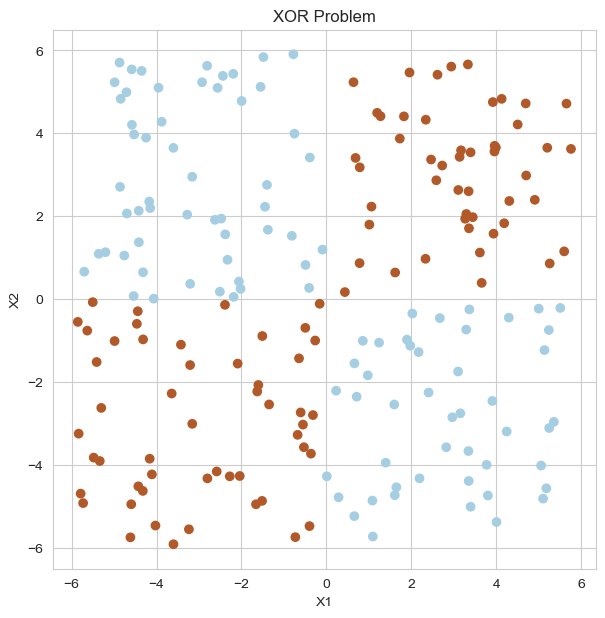

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7, 7)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="Paired")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Problem")
plt.show()

#### 3.
Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

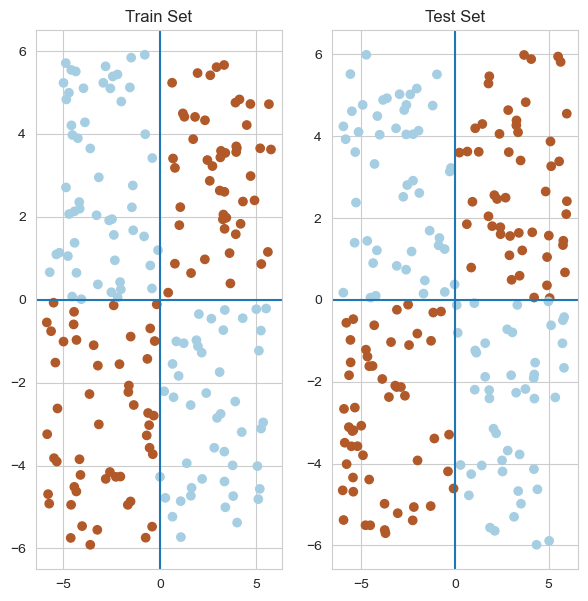

In [4]:
x_test = default_rng.uniform(-6, 6, (200, 2))
y_test_mask = ((x_test[:, 0] > 0) & (x_test[:, 1] > 0)) | ((x_test[:, 0] < 0) & (x_test[:, 1] < 0))
y_test = np.zeros(x_test.shape[0])
y_test[y_test_mask] = 1

fig, axs = plt.subplots(1, 2)

axs[0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="Paired")
axs[0].axhline(0, -6, 6)
axs[0].axvline(0, -6, 6)
axs[0].set_title("Train Set")
axs[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="Paired")
axs[1].axhline(0, -6, 6)
axs[1].axvline(0, -6, 6)
axs[1].set_title("Test Set")
plt.show()


#### 4.
Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [5]:
w_ver = np.array([1, 0])
w_hor = np.array([0, 1])


#### 5.
Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

In [6]:
x = np.linspace(-6, 6, 100)

x, y = np.meshgrid(x, x)

grid = np.vstack((x.flatten(), y.flatten())).T


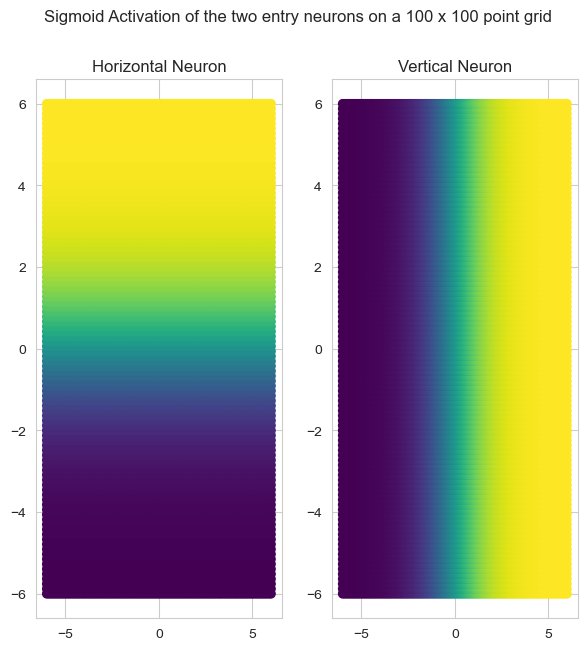

In [7]:
from nn2 import sigmoid

fig, axs = plt.subplots(1, 2)

fig.suptitle("Sigmoid Activation of the two entry neurons on a 100 x 100 point grid")

axs[0].scatter(grid[:, 0], grid[:, 1], c=sigmoid(grid @ w_hor.T), cmap="viridis")
axs[0].set_title("Horizontal Neuron")
axs[1].scatter(grid[:, 0], grid[:, 1], c=sigmoid(grid @ w_ver.T), cmap="viridis")
axs[1].set_title("Vertical Neuron")
plt.show()

#### 6.
Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings-
und Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entspre-
chende Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [8]:
train_design = np.vstack(((sigmoid(x_train @ w_ver.T)), sigmoid(x_train @ w_hor.T))).T
test_design = np.vstack(((sigmoid(x_test @ w_ver.T)), sigmoid(x_test @ w_hor.T))).T
grid_design = np.vstack(((sigmoid(grid @ w_ver.T)), sigmoid(grid @ w_hor.T))).T

### 2. Trainings eines MLP auf den Spieldatensatz

#### 1.
Setzen Sie im Code die Größe der Minibatches auf 10, die Anzahl der Epochen
auf 150 und die Lernrate auf 0.03. Ändern Sie die Netzarchitektur so ab, dass sie 2
Eingangsneuronen, 2 verdeckte Schichten mit jeweils 2 Neuronen und 1 Ausgangsneuron
haben. Überprüfen Sie die Größen der sich daraus ergebenden Gewichtsmatritzen auf
Korrektheit.

In [33]:
from nn2 import FCNN

configs = {
    "eta": 1,
    "mbs": 10,
    "activation": "sigmoid",
    "sizes": [2, 2, 2, 1],
    "cost_function": "mse"
}

model = FCNN(**configs)

In [34]:
model.weights[0]

array([[ 1.20870728,  0.38595384],
       [-0.58704037, -1.1851072 ]])

#### 2.
Der Beispielcode verwendet One-Hot-Coding für die Labels, in unserem Beispiel sind
die Klassenzugehörigkeiten aber durch die Klassenindizes 0 und 1 codiert. Wir müssen
daher die Funktion evaluate() im Code so abändern, dass ein Beispiel als korrekt
klassifiziert gilt, wenn bei Klasse 0 der MLP-Output kleiner als 0.5 ist und bei Klasse 1
größer als 0.5. Berechnen Sie zusätzlich den MSE in dieser Funktion bei jedem Aufruf
uns speichern Sie diesen in einem zusätzlichen Array ab.

#### 3.
Trainieren Sie Ihr Netz mit den Trainingsdaten als Validierungsdaten und testen Sie es
auf Ihren Testdaten. Stellen Sie die Lernkurven für Genauigkeit und MSE als Plots dar.
Beachten Sie hierbei, dass unser Lernproblem nicht konvex ist, so dass die Optimierung
zuweilen in lokalen Minima hängenbleiben kann. Wiederholen Sie Ihren Versuch daher
mehrere Male und vergeleichen Sie die Ergebnisse.

In [36]:
acc, loss, models = [], [], []

for i in range(12):
    model = FCNN(**configs)
    model(x1=train_design, y1=y_train, x2=test_design, y2=y_test, epochs=150, logging=False)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)
    models.append(model)
    print(f"Model {i + 1}: Validation Loss: {loss[i][-1]:.4f} --- Validation Accuracy: {acc[i][-1]:.4f}")


Model 1: Validation Loss: 0.0829 --- Validation Accuracy: 141.0000
Model 2: Validation Loss: 0.1255 --- Validation Accuracy: 95.0000
Model 3: Validation Loss: 0.1250 --- Validation Accuracy: 105.0000
Model 4: Validation Loss: 0.0922 --- Validation Accuracy: 148.0000
Model 5: Validation Loss: 0.0371 --- Validation Accuracy: 188.0000
Model 6: Validation Loss: 0.0984 --- Validation Accuracy: 146.0000
Model 7: Validation Loss: 0.0268 --- Validation Accuracy: 187.0000
Model 8: Validation Loss: 0.0727 --- Validation Accuracy: 146.0000
Model 9: Validation Loss: 0.1249 --- Validation Accuracy: 105.0000
Model 10: Validation Loss: 0.0909 --- Validation Accuracy: 148.0000
Model 11: Validation Loss: 0.0947 --- Validation Accuracy: 143.0000
Model 12: Validation Loss: 0.1248 --- Validation Accuracy: 142.0000


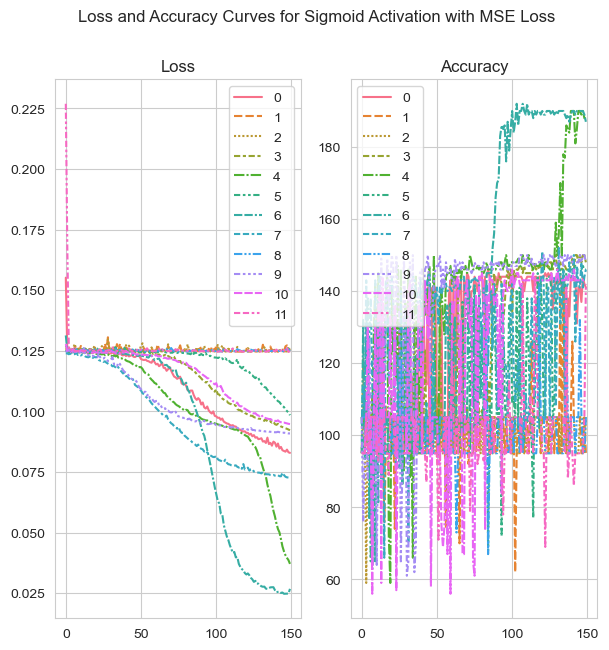

In [37]:
import seaborn as sns

fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

fig.suptitle("Loss and Accuracy Curves for Sigmoid Activation with MSE Loss")
plt.show()

[TF Playground mit ähnlich schlechter Performanz bei gleichen Hyperparametern](http://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.79381&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

#### 4.
Berechnen Sie die Entscheidungsfunktion Ihres MLPs für Ihr 100 × 100-Gitter und
stellen Sie diese gemeinsam mit dem Scatterplot Ihrer Trainingsdaten dar.

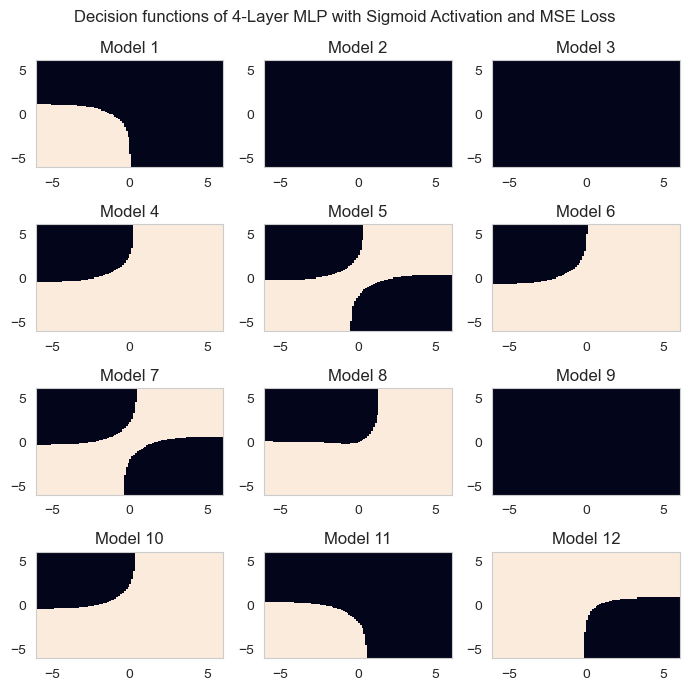

In [38]:
fig, axs = plt.subplots(4, 3)


for idx, ax in enumerate(axs.flatten()):
    layer_0 = sigmoid((grid_design @ models[idx].weights[0].T) + models[idx].biases[0].T)
    layer_1 = sigmoid((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)
    decision_function = sigmoid((layer_1 @ models[idx].weights[2].T) + models[idx].biases[2].T)

    decision_function[decision_function >= 0.5] = 1
    decision_function[decision_function < 0.5] = 0

    ax.set_title(f"Model {idx + 1}")
    ax.pcolormesh(x, y, decision_function.reshape(x.shape))
    # sns.scatterplot(x = grid[:, 0], y = grid[:, 1], c = decision_function, ax = ax, cmap = "viridis")

fig.suptitle("Decision functions of 4-Layer MLP with Sigmoid Activation and MSE Loss")
fig.tight_layout()

plt.show()

MLP hier nicht in der Lage vernünftige Entscheidungsgrenze zu lernen

### 3. Nachvollziehen der Beispiele aus der Vorlesung
Das Netz aus der Vorlesung verwendet als Aktivierungsfunktion den Tangens hyperbolicus
(np.tanh()). Passen Sie die Funktionen sigmoid() und sigmoid_prime() entsprechend
an. Achtung: kommentieren Sie den bisherigen Code für die Sigmoidfunktion nur aus, wir
werden ihn in der nächsten Aufgabe nochmals benötigen. Da die Ausgangswerte von tanh
im Intervall [−1, 1] statt [0, 1] liegen, müssen wir hierfür nochmals die Funktion evaluate()
entsprechend anpassen. Vollziehen Sie die 3 Beispiele aus der Vorlesung nach.

In [23]:
configs = {
    "eta": 1,
    "mbs": 10,
    "sizes": [2, 2, 2, 1],
    "activation": "tanh",
    "cost_function": "mse"
}

In [24]:
acc, loss, models = [], [], []

for i in range(12):
    model = FCNN(**configs)
    model(x1=train_design, y1=y_train, x2=test_design, y2=y_test, epochs=150, logging=False)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)
    models.append(model)
    print(f"Model {i + 1}: Validation Loss: {loss[i][-1]:.4f} --- Validation Accuracy: {acc[i][-1]:.4f}")


Model 1: Validation Loss: 0.0974 --- Validation Accuracy: 148.0000
Model 2: Validation Loss: 0.1151 --- Validation Accuracy: 143.0000
Model 3: Validation Loss: 0.1246 --- Validation Accuracy: 105.0000
Model 4: Validation Loss: 0.0340 --- Validation Accuracy: 189.0000
Model 5: Validation Loss: 0.1033 --- Validation Accuracy: 149.0000
Model 6: Validation Loss: 0.1071 --- Validation Accuracy: 142.0000
Model 7: Validation Loss: 0.0229 --- Validation Accuracy: 190.0000
Model 8: Validation Loss: 0.1244 --- Validation Accuracy: 105.0000
Model 9: Validation Loss: 0.0213 --- Validation Accuracy: 194.0000
Model 10: Validation Loss: 0.1247 --- Validation Accuracy: 105.0000
Model 11: Validation Loss: 0.0903 --- Validation Accuracy: 150.0000
Model 12: Validation Loss: 0.1243 --- Validation Accuracy: 111.0000


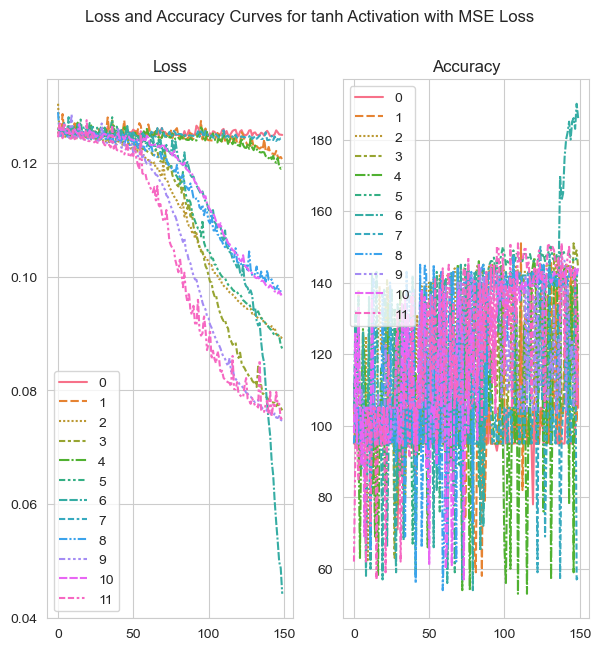

In [16]:
fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

fig.suptitle("Loss and Accuracy Curves for tanh Activation with MSE Loss")
plt.show()

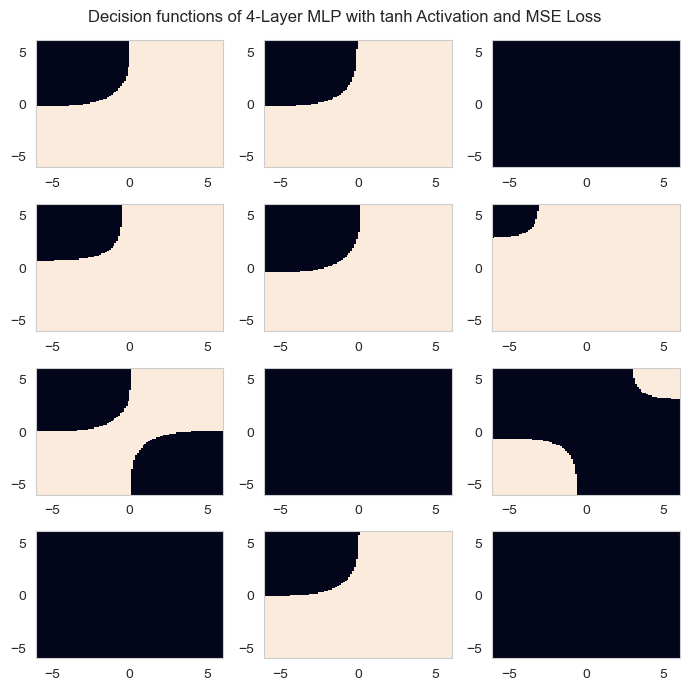

In [25]:
from nn2 import tanh

fig, axs = plt.subplots(4, 3)


for idx, ax in enumerate(axs.flatten()):
    layer_0 = np.tanh((grid_design @ models[idx].weights[0].T) + models[idx].biases[0].T)
    layer_1 = np.tanh((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)
    decision_function = np.tanh((layer_1 @ models[idx].weights[2].T) + models[idx].biases[2].T)

    label_mask = decision_function >= 0

    decision_function[label_mask] = 1
    decision_function[~label_mask] = 0

    ax.pcolormesh(x, y, decision_function.reshape((100, 100)))

fig.suptitle("Decision functions of 4-Layer MLP with tanh Activation and MSE Loss")
fig.tight_layout()

plt.show()

#### 4. Beispiele aus der Vorlesung

##### Ein Hidden-Layer zwei Neuronen

In [61]:
configs = {
    "eta": 1,
    "mbs": 10,
    "sizes": [2, 2, 1],
    "activation": "tanh",
    "cost_function": "mse"
}

In [62]:
acc, loss, models = [], [], []

for i in range(12):
    model = FCNN(**configs)
    model(x1=train_design, y1=y_train, x2=test_design, y2=y_test, epochs=150, logging=False)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)
    models.append(model)
    print(f"Model {i + 1}: Validation Loss: {loss[i][-1]:.4f} --- Validation Accuracy: {acc[i][-1]:.4f}")

Model 1: Validation Loss: 0.0250 --- Validation Accuracy: 189.0000
Model 2: Validation Loss: 0.0247 --- Validation Accuracy: 189.0000
Model 3: Validation Loss: 0.0166 --- Validation Accuracy: 195.0000
Model 4: Validation Loss: 0.0209 --- Validation Accuracy: 194.0000
Model 5: Validation Loss: 0.0243 --- Validation Accuracy: 189.0000
Model 6: Validation Loss: 0.1255 --- Validation Accuracy: 98.0000
Model 7: Validation Loss: 0.0261 --- Validation Accuracy: 190.0000
Model 8: Validation Loss: 0.0529 --- Validation Accuracy: 190.0000
Model 9: Validation Loss: 0.1062 --- Validation Accuracy: 146.0000
Model 10: Validation Loss: 0.1251 --- Validation Accuracy: 101.0000
Model 11: Validation Loss: 0.0724 --- Validation Accuracy: 146.0000
Model 12: Validation Loss: 0.0409 --- Validation Accuracy: 189.0000


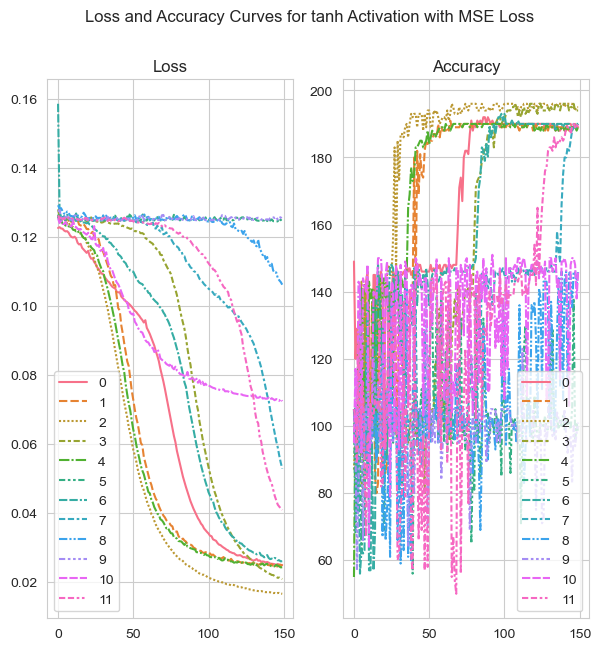

In [63]:
fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

fig.suptitle("Loss and Accuracy Curves for tanh Activation with MSE Loss")
plt.show()

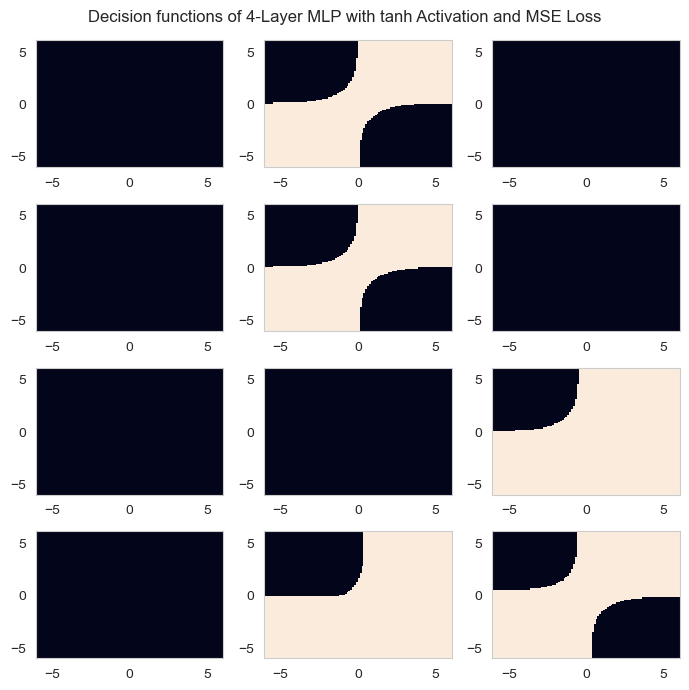

In [64]:
fig, axs = plt.subplots(4, 3)


for idx, ax in enumerate(axs.flatten()):
    layer_0 = np.tanh((grid_design @ models[idx].weights[0].T) + models[idx].biases[0].T)
    # layer_1 = np.tanh((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)
    decision_function = np.tanh((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)

    label_mask = decision_function >= 0

    decision_function[label_mask] = 1
    decision_function[~label_mask] = 0


    ax.pcolormesh(x, y, decision_function.reshape((100, 100)))

fig.suptitle("Decision functions of 4-Layer MLP with tanh Activation and MSE Loss")
fig.tight_layout()

plt.show()

##### Eine versteckte Schicht -- drei Neuronen

In [66]:
configs = {
    "eta": 1,
    "mbs": 10,
    "sizes": [2, 3, 1],
    "activation": "tanh",
    "cost_function": "mse"
}

In [67]:
acc, loss, models = [], [], []

for i in range(12):
    model = FCNN(**configs)
    model(x1=train_design, y1=y_train, x2=test_design, y2=y_test, epochs=150, logging=False)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)
    models.append(model)
    print(f"Model {i + 1}: Validation Loss: {loss[i][-1]:.4f} --- Validation Accuracy: {acc[i][-1]:.4f}")

Model 1: Validation Loss: 0.0188 --- Validation Accuracy: 194.0000
Model 2: Validation Loss: 0.0245 --- Validation Accuracy: 188.0000
Model 3: Validation Loss: 0.0241 --- Validation Accuracy: 189.0000
Model 4: Validation Loss: 0.0208 --- Validation Accuracy: 191.0000
Model 5: Validation Loss: 0.0196 --- Validation Accuracy: 194.0000
Model 6: Validation Loss: 0.0304 --- Validation Accuracy: 190.0000
Model 7: Validation Loss: 0.0257 --- Validation Accuracy: 189.0000
Model 8: Validation Loss: 0.0174 --- Validation Accuracy: 194.0000
Model 9: Validation Loss: 0.0294 --- Validation Accuracy: 190.0000
Model 10: Validation Loss: 0.0515 --- Validation Accuracy: 187.0000
Model 11: Validation Loss: 0.0213 --- Validation Accuracy: 190.0000
Model 12: Validation Loss: 0.0198 --- Validation Accuracy: 193.0000


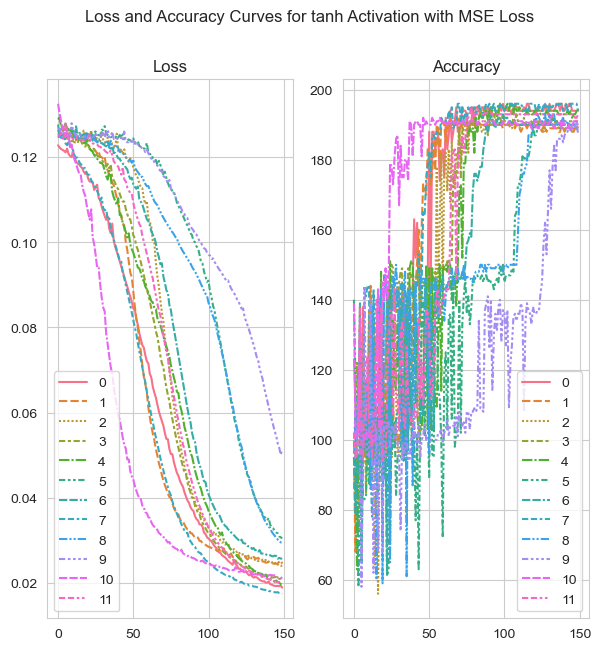

In [68]:
fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

fig.suptitle("Loss and Accuracy Curves for tanh Activation with MSE Loss")
plt.show()

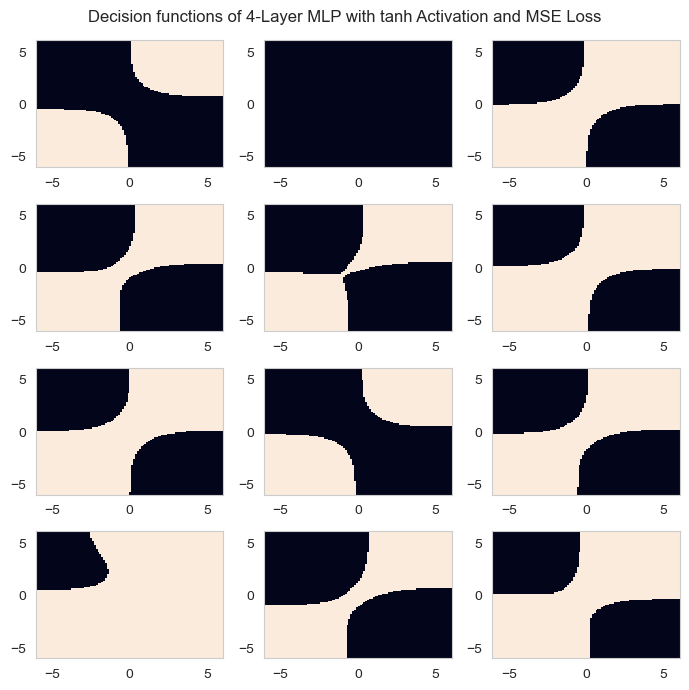

In [69]:
fig, axs = plt.subplots(4, 3)


for idx, ax in enumerate(axs.flatten()):
    layer_0 = np.tanh((grid_design @ models[idx].weights[0].T) + models[idx].biases[0].T)
    # layer_1 = np.tanh((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)
    decision_function = np.tanh((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)

    label_mask = decision_function >= 0

    decision_function[label_mask] = 1
    decision_function[~label_mask] = 0


    ax.pcolormesh(x, y, decision_function.reshape((100, 100)))

fig.suptitle("Decision functions of 4-Layer MLP with tanh Activation and MSE Loss")
fig.tight_layout()

plt.show()

##### 2 Hidden layer a 3, 2

In [70]:
configs = {
    "eta": 1,
    "mbs": 10,
    "sizes": [2, 3, 2, 1],
    "activation": "tanh",
    "cost_function": "mse"
}

In [71]:
acc, loss, models = [], [], []

for i in range(12):
    model = FCNN(**configs)
    model(x1=train_design, y1=y_train, x2=test_design, y2=y_test, epochs=150, logging=False)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)
    models.append(model)
    print(f"Model {i + 1}: Validation Loss: {loss[i][-1]:.4f} --- Validation Accuracy: {acc[i][-1]:.4f}")

Model 1: Validation Loss: 0.0957 --- Validation Accuracy: 147.0000
Model 2: Validation Loss: 0.1211 --- Validation Accuracy: 92.0000
Model 3: Validation Loss: 0.1242 --- Validation Accuracy: 63.0000
Model 4: Validation Loss: 0.0622 --- Validation Accuracy: 187.0000
Model 5: Validation Loss: 0.0161 --- Validation Accuracy: 192.0000
Model 6: Validation Loss: 0.0266 --- Validation Accuracy: 189.0000
Model 7: Validation Loss: 0.1041 --- Validation Accuracy: 141.0000
Model 8: Validation Loss: 0.0968 --- Validation Accuracy: 140.0000
Model 9: Validation Loss: 0.1243 --- Validation Accuracy: 102.0000
Model 10: Validation Loss: 0.1235 --- Validation Accuracy: 99.0000
Model 11: Validation Loss: 0.0183 --- Validation Accuracy: 194.0000
Model 12: Validation Loss: 0.0802 --- Validation Accuracy: 150.0000


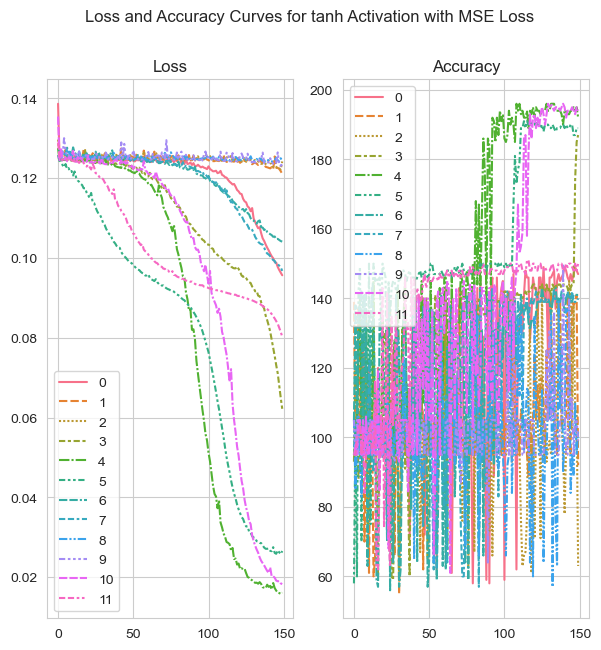

In [72]:
fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

fig.suptitle("Loss and Accuracy Curves for tanh Activation with MSE Loss")
plt.show()

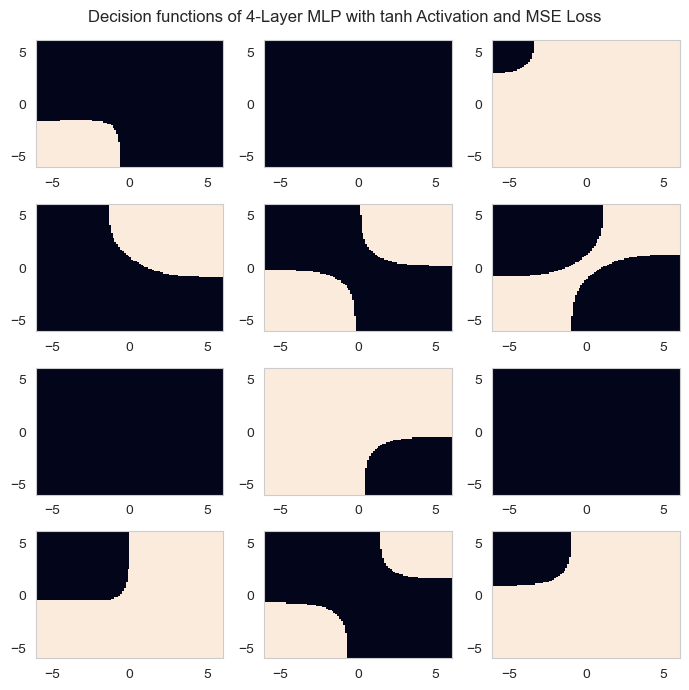

In [74]:
fig, axs = plt.subplots(4, 3)


for idx, ax in enumerate(axs.flatten()):
    layer_0 = np.tanh((grid_design @ models[idx].weights[0].T) + models[idx].biases[0].T)
    layer_1 = np.tanh((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)
    decision_function = np.tanh((layer_1 @ models[idx].weights[2].T) + models[idx].biases[2].T)

    label_mask = decision_function >= 0

    decision_function[label_mask] = 1
    decision_function[~label_mask] = 0


    ax.pcolormesh(x, y, decision_function.reshape((100, 100)))

fig.suptitle("Decision functions of 4-Layer MLP with tanh Activation and MSE Loss")
fig.tight_layout()

plt.show()

### 4. Logistische Regression
Eine alternative, besser an das Klassifikationsszenario angepasste Kostenfunktion statt des
MSE ist die Kostenfunktion für die logistische Regression:
$ C = -ylog(a^{L}) - (1- y)log(1-a^{L}).$
Damit Sie diese in Ihrem Beispiel anwenden können, müssen Sie die Ableitung ∇aLC
berechnen und die Funktion cost_derivative() entsprechend abändern. Da die logistische
Regression davon ausgeht, dass der Output des Netzes eine Wahrscheinlichkeit zwischen 0
und 1 ist, können wir hierfür nicht den tanh() als Aktivierungsfunktion verwenden. Machen
Sie daher Ihre Änderungen aus Aufgabe 3 rückgängig, so dass Sie wieder eine sigmoide
Aktivierungsfunktion haben. In der Funktion evaluate() sollte natürlich statt des MSE
die Kostenfunktion der logistischen Regression ausgegeben werden, um zu überprüfen, ob
tatsächlich ein Gradientenabstieg stattfindet. Weiterhin ist es nützlich, sowohl auf C wie auf
∇aLC die Funktion np.nan_to_num() anzuwenden, da hier zuweilen numerische Probleme
auftreten können. Auch die Lernrate muss angepasst werden: η = 1.0 funktioniert hier
deutlich besser.

In [18]:
configs = {
    "eta": 1,
    "mbs": 10,
    "sizes": [2, 2, 2, 1],
    "activation": "sigmoid",
    "cost_function": "logistic_loss"
}

In [19]:
acc, loss, models = [], [], []

for i in range(12):
    model = FCNN(**configs)
    model(x1=train_design, y1=y_train, x2=test_design, y2=y_test, epochs=150, logging=False)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)
    models.append(model)
    print(f"Model {i}: Validation Loss: {loss[i][-1]:.4f} --- Validation Accuracy: {acc[i][-1]:.4f}")



Model 0: Validation Loss: 0.6597 --- Validation Accuracy: 145.0000
Model 1: Validation Loss: 0.6508 --- Validation Accuracy: 143.0000
Model 2: Validation Loss: 0.1403 --- Validation Accuracy: 194.0000
Model 3: Validation Loss: 0.1116 --- Validation Accuracy: 193.0000
Model 4: Validation Loss: 0.6904 --- Validation Accuracy: 144.0000
Model 5: Validation Loss: 0.6182 --- Validation Accuracy: 143.0000
Model 6: Validation Loss: 0.2379 --- Validation Accuracy: 189.0000
Model 7: Validation Loss: 0.6591 --- Validation Accuracy: 145.0000
Model 8: Validation Loss: 0.6547 --- Validation Accuracy: 142.0000
Model 9: Validation Loss: 0.2166 --- Validation Accuracy: 185.0000
Model 10: Validation Loss: 0.6693 --- Validation Accuracy: 141.0000
Model 11: Validation Loss: 0.6481 --- Validation Accuracy: 143.0000


Text(0.5, 1.0, 'Accuracy')

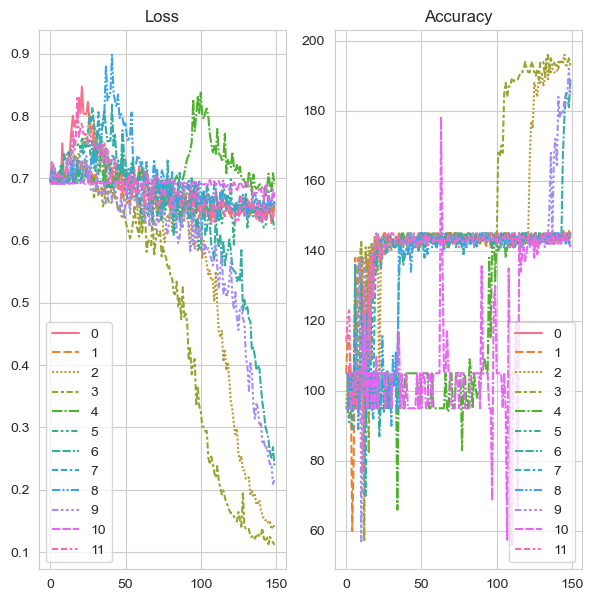

In [20]:
fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

Wahrscheinlich nicht numerisch stabil, konvergiert aber nach Anpassung der Epochen von 100 --> 200

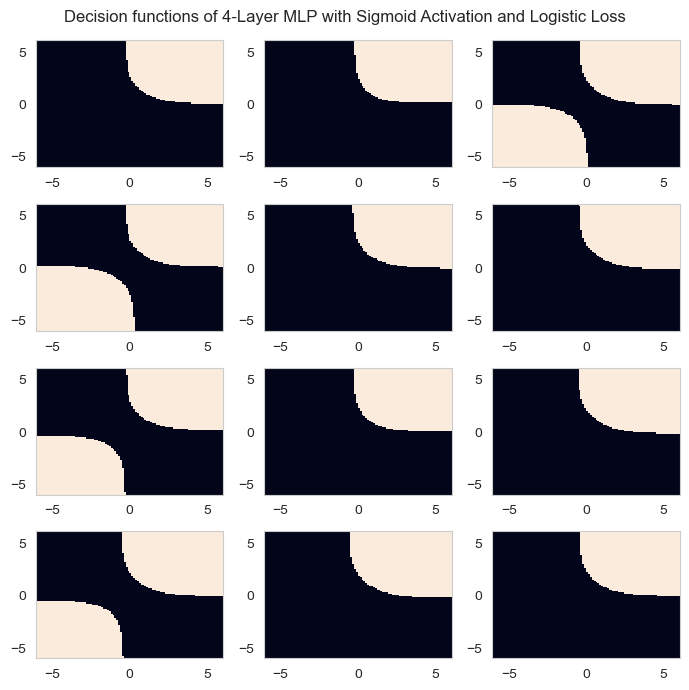

In [21]:
fig, axs = plt.subplots(4, 3)


for idx, ax in enumerate(axs.flatten()):
    layer_0 = sigmoid((grid_design @ models[idx].weights[0].T) + models[idx].biases[0].T)
    layer_1 = sigmoid((layer_0 @ models[idx].weights[1].T) + models[idx].biases[1].T)
    decision_function = sigmoid((layer_1 @ models[idx].weights[2].T) + models[idx].biases[2].T)

    decision_function[decision_function >= 0.5] = 1
    decision_function[decision_function < 0.5] = 0

    ax.pcolormesh(x, y, decision_function.reshape((100, 100)))

fig.suptitle("Decision functions of 4-Layer MLP with Sigmoid Activation and Logistic Loss")
fig.tight_layout()

plt.show()